# Sonia
### Columna a describir: __Pais (Q3)__

### Pregunta a responder: __¿Cuál es el lenguaje de programación más utilizado (Q7)?__

## Descripción de la columna __Pais (Q3)__
Tareas a realizar para describir la columna:
- dejar la columna preparada para la deteccion de los NaN (que los nulos se detecten como nulos).
- pensar categorias para esta columna (si se puede, genero ya estaria categorizada).
- hablar de los elementos de los valores unicos (si se puede, sino crear rangos o categorias) y su frecuencia.

In [1]:
# importamos las librerias necesarias para la utilizacion de sus metodos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
# creamos el dataframe a partir del archivo .csv .
df_country=pd.read_csv('../files/df_a_usar_2.csv',index_col=0)
#Mostramos todas las columnas sin truncar ninguna.
pd.options.display.max_columns=None
#Mostramos las 3 primeras filas del dataframe.
df_country.head(3)

,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,Q15,sector_q20,company_size_q21,Q22,Q23,anual_income_q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Dat

In [3]:
#Ponemos la columna 'Index' como columna de indices.
df_country=df_country.set_index('index')
df_country.head(3)

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,Q15,sector_q20,company_size_q21,Q22,Q23,anual_income_q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,N

In [4]:
#Comprobamos el numero de filas y columans que tiene nuestro dataframe.
print(f'El dataframe df_country tiene {df_country.shape[0]} filas y {df_country.shape[1]} columnas.')

El dataframe df_country tiene 25973 filas y 241 columnas.


In [5]:
#Hacemos lista de todos los nombres de las columans del dataframe para poder observarlas
#  en una ventana aparte en un editor de texto,asi no se cortan todos los nombres de columnas.
list(df_country.columns)

['time',
 'age',
 'gender',
 'country_q3',
 'education_q4',
 'role_q5',
 'experience_q6',
 'Q8',
 'Q11',
 'Q13',
 'Q15',
 'sector_q20',
 'company_size_q21',
 'Q22',
 'Q23',
 'anual_income_q25',
 'Q26',
 'Q33',
 'Q35',
 'Q41',
 'Q7',
 'Q9',
 'Q12',
 'Q14',
 'Q16',
 'Q17',
 'Q24',
 'Q32',
 'Q34',
 'Q18_Part_1',
 'Q18_Part_2',
 'Q18_Part_3',
 'Q18_Part_4',
 'Q18_Part_5',
 'Q18_Part_6',
 'Q18_OTHER',
 'Q19_Part_1',
 'Q19_Part_2',
 'Q19_Part_3',
 'Q19_Part_4',
 'Q19_Part_5',
 'Q19_OTHER',
 'Q27_A_Part_1',
 'Q27_A_Part_2',
 'Q27_A_Part_3',
 'Q27_A_Part_4',
 'Q27_A_Part_5',
 'Q27_A_Part_6',
 'Q27_A_Part_7',
 'Q27_A_Part_8',
 'Q27_A_Part_9',
 'Q27_A_Part_10',
 'Q27_A_Part_11',
 'Q27_A_OTHER',
 'Q28',
 'Q29_A_Part_1',
 'Q29_A_Part_2',
 'Q29_A_Part_3',
 'Q29_A_Part_4',
 'Q29_A_OTHER',
 'Q30_A_Part_1',
 'Q30_A_Part_2',
 'Q30_A_Part_3',
 'Q30_A_Part_4',
 'Q30_A_Part_5',
 'Q30_A_Part_6',
 'Q30_A_Part_7',
 'Q30_A_OTHER',
 'Q31_A_Part_1',
 'Q31_A_Part_2',
 'Q31_A_Part_3',
 'Q31_A_Part_4',
 'Q31_A_Par

In [25]:
#Seleccionamos solo las columnas que nos pueden interesar analizar junto con la columna country_q3, que
#  corresponde al pais de residencia actual.
df_country2=df_country[['age', 'gender', 'country_q3', 'education_q4', 'role_q5', 'experience_q6','Q7','sector_q20', 'company_size_q21','anual_income_q25','Q33','Q41']]
df_country2.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,Q7,sector_q20,company_size_q21,anual_income_q25,Q33,Q41
index,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt..."
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G..."


In [26]:
df_country2=df_country2.rename(columns={'Q7':'prog_lang_q7', 'Q33':'big_data_q33','Q41':'data_analyze_tool_q41'})

In [27]:
#Comprobamos el numero de valores nulos que hay en las columnas que hemos dejado en nuestro dataframe.
pd.isnull(df_country2).sum()
#Vemos que la columna 'country_q3' no tienen ningun valor nulo.

age                          0
gender                       0
country_q3                   0
education_q4                 0
role_q5                      0
experience_q6                0
prog_lang_q7              1032
sector_q20                9648
company_size_q21          9722
anual_income_q25         10582
big_data_q33             21317
data_analyze_tool_q41     7484
dtype: int64

In [28]:
#Obtenemos una lista de todos los paises que se mencionan en la columna 'country_q3' y la
#  ordenamos por orden alfabetico para ver posibles erratas y datos que no sean paises.
countries=df_country2['country_q3'].unique()
np.sort(countries)
#Vemos que hay un 'I do not wish to disclose my location' y un 'Other'.

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Colombia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'Ethiopia', 'France', 'Germany', 'Ghana', 'Greece',
       'Hong Kong (S.A.R.)', 'I do not wish to disclose my location',
       'India', 'Indonesia', 'Iran, Islamic Republic of...', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kenya',
       'Malaysia', 'Mexico', 'Morocco', 'Nepal', 'Netherlands', 'Nigeria',
       'Norway', 'Other', 'Pakistan', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Saudi Arabia', 'Singapore',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Turkey', 'Uganda',
       'Ukraine', 'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Viet Nam'], dtype=object)

In [30]:
#Obtenemos el numero de veces que se repite cada pais en la columna 'country_q3'.
df_country2['country_q3'].value_counts()
#Se observa que el pais más mencionado es India, seguido de USA. Además se observa que 1270 personas
#  han respondido la opcion 'other', por lo que no podemos conocer su procedencia, ya que no se
#  encontraba entre los paises que ofrecia el cuestionario.

India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Kazakhstan                    45
Norway                        45
Algeria                       44
Ethiopia                      43
Iraq                          43
Name: country_q3, Length: 66, dtype: int64

In [29]:
anon_rows=df_country2.loc[df_country2['country_q3']=='I do not wish to disclose my location'].shape[0]
print(f'De las 25973 personas interrogadas, {anon_rows} personas han respondido "I do not wish to disclose my location" en el pais de prodecencia.')

De las 25973 personas interrogadas, 69 personas han respondido "I do not wish to disclose my location" en el pais de prodecencia.


In [31]:
#Creamos una copia de nuestro dataframe.
df_country3=df_country2.copy()

In [32]:
#Vamos a crear una columna nueva para establecer a que continente pertenece cada pais de procedencia.
#Para ello debemos intalarnos la libreria 'pycountry-convert'
#pip install pycountry-convert
#Y la importamos.

import pycountry_convert as pc

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return country_name

In [33]:
df_country2['continent']=df_country2['country_q3'].apply(country_to_continent)
df_country2.head()

,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7,sector_q20,company_size_q21,anual_income_q25,big_data_q33,data_analyze_tool_q41,continent
index,,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt...",Asia
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)",Asia
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G...",Asia
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Academics/Education,"1000-9,999 employees","30,000-39,999",NaN,"Local development environments (RStudio, Jupyt...",North America
4,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python, C, MATLAB",Academics/Education,50-249 employees,"30,000-39,999",NaN,"Local development environments (RStudio, Jupyt...",Asia


In [34]:
df_country2['continent'].value_counts()

Asia                                     13022
Europe                                    4327
North America                             3260
Africa                                    2060
South America                             1427
Other                                     1270
Oceania                                    264
Iran, Islamic Republic of...               195
Hong Kong (S.A.R.)                          79
I do not wish to disclose my location       69
Name: continent, dtype: int64

In [15]:
#Como vemos que la liberia tiene problemas para ubicar en un continente a 'Iran' y 'Hong Kong' procedemos
#  a crear una columna con un nombre reconocible para esos paises por la libreria. Las respuestas
# 'Other' y 'I do not wish to disclose my location' las dejaremos igual.


In [35]:
#Obtenemos los indicies de las filas que contienen 'Iran, Islamic Republic of...' en la columna country.
index_iran=df_country3.index[df_country3['country_q3']=='Iran, Islamic Republic of...']
print('Numero de indices obtenidos:',len(index_iran))

Numero de indices obtenidos: 195


In [36]:
#Iterando por los indices vamos sustituyendo el nombre de 'Iran, Islamic Republic of...' por 'Iran'.
for i in index_iran:
    df_country3['country_q3'].iloc[i] = "Iran"

In [37]:
#Comprobamos que no queda ninguna fila con el antiguo nombre de 'Iran'.
iran_rows2=df_country3.loc[df_country3['country_q3']=='Iran, Islamic Republic of...'].shape
print(f'De las 25973 personas interrogadas, {iran_rows2[0]} personas han respondido "Iran, Islamic Republic of..." en el pais de prodecencia.')

De las 25973 personas interrogadas, 0 personas han respondido "Iran, Islamic Republic of..." en el pais de prodecencia.


In [38]:
#Procedemos a hacer lo mismo con Hong Kong.
index_hk=df_country3.index[df_country3['country_q3']=='Hong Kong (S.A.R.)']
print('Numero de indices obtenidos:',len(index_hk))

Numero de indices obtenidos: 79


In [39]:
for i in index_hk:
    df_country3['country_q3'].iloc[i] = 'Hong Kong'

In [40]:
hk_rows2=df_country3.loc[df_country3['country_q3']=='Hong Kong (S.A.R.)'].shape
print(f'De las 25973 personas interrogadas, {hk_rows2[0]} personas han respondido "Hong Kong (S.A.R.)" en el pais de prodecencia.')

De las 25973 personas interrogadas, 0 personas han respondido "Hong Kong (S.A.R.)" en el pais de prodecencia.


In [41]:
#Volvemos a intentar aplicar la funcion ahora que hemos sustituido Iran.
df_country3['continent']=df_country3['country_q3'].apply(country_to_continent)

In [24]:
countries3=df_country3['country_q3'].unique()
np.sort(countries3)

array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Bangladesh',
       'Belarus', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China',
       'Colombia', 'Czech Republic', 'Denmark', 'Ecuador', 'Egypt',
       'Ethiopia', 'France', 'Germany', 'Ghana', 'Greece', 'Hong Kong',
       'I do not wish to disclose my location', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kenya', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Nigeria', 'Norway', 'Other', 'Pakistan', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Tunisia', 'Turkey', 'Uganda', 'Ukraine',
       'United Arab Emirates',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Viet Nam'], dtype=object)

In [60]:
#Comprobamos que la funcion ahora si ha funcionado correctametne sin dejar ningun pais suelto.
continent_counts=df_country3['continent'].value_counts()
continent_counts

Asia                                     13296
Europe                                    4327
North America                             3260
Africa                                    2060
South America                             1427
Other                                     1270
Oceania                                    264
I do not wish to disclose my location       69
Name: continent, dtype: int64

In [43]:
df_country3.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7,sector_q20,company_size_q21,anual_income_q25,big_data_q33,data_analyze_tool_q41,continent
index,,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt...",Asia
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)",Asia
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G...",Asia


In [52]:
list(df_country3['continent'].unique())

['Asia',
 'North America',
 'Europe',
 'Oceania',
 'Africa',
 'South America',
 'Other',
 'I do not wish to disclose my location']

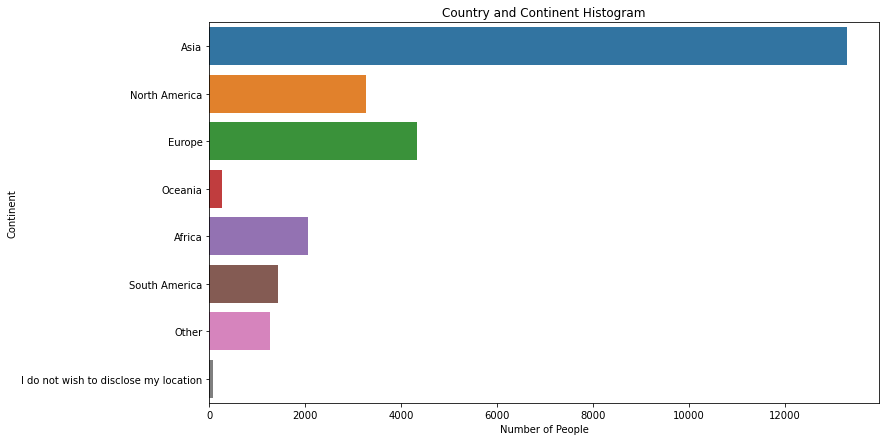

In [44]:
#Observamos la frecuencia de cada pais y cada continente.
plt.figure(figsize=(12,7))
fig=sns.countplot(y='continent', data=df_country3)
#podriamos poner hue='country, pero quedan barras muy finas y una leyenda demasiado extensa.
fig.set(ylabel='Continent',xlabel='Number of People')
fig.set_title('Country and Continent Histogram')
#plt.xticks(rotation = 90)
  
plt.show()

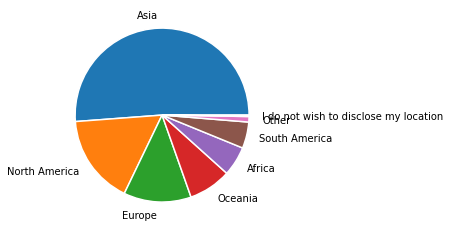

In [80]:
#Lo representamos en un piechart para ver si es más visual.
plt.figure()
plt.pie(continent_counts,labels=list(df_country3['continent'].unique()), labeldistance=1.15,wedgeprops = { 'linewidth' : 1.5, 'edgecolor' : 'white' })

plt.show()

In [72]:
#Guardamos el dataframe para futuros analisis con esta columna.
df_country3.to_csv('../files/df_country_q3.csv')

In [74]:
#Creamos una copia de nuestro dataframe.
df_country4=df_country3.copy()

In [75]:
df_country4['gender2'] = df_country4['gender'].replace({'Man': 'Man', 'Woman': 'Woman', 'Prefer to self-describe': 'NB', 'Nonbinary': 'NB', 'Prefer not to say': np.nan})
df_country4['gender2'].value_counts()

Man      20598
Woman     4890
NB         130
Name: gender2, dtype: int64

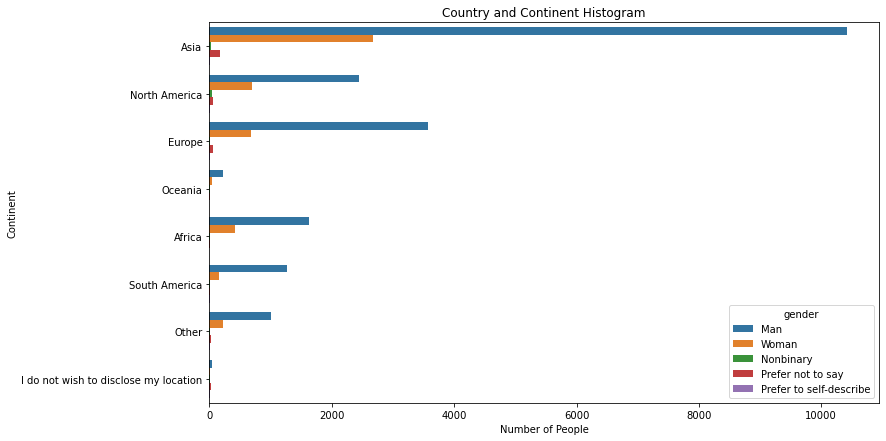

In [78]:
#Observamos la frecuencia de los generos en cada continente.
plt.figure(figsize=(12,7))
fig=sns.countplot(y='continent', data=df_country3,hue='gender')
#podriamos poner hue='country, pero quedan barras muy finas y una leyenda demasiado extensa.
fig.set(ylabel='Continent',xlabel='Number of People')
fig.set_title('Gender and Continent Histogram')
#plt.xticks(rotation = 90)
  
plt.show()

### Comprobamos la distribucion de hombres, mujeres y no binarios por paises.

In [64]:
#Primero observamos dentro de cada pais su distribucion.
crosstab_country_gender1=pd.crosstab(df_country4['country_q3'], df_country4['gender2'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_country_gender1
#Se puede ver que todos los paises tiene mayoria de hombres. Siendo Tunisia el pais que mas equilibrado
#  estan los hombres y mujeres. Y siendo Peru el pais con mayor desigualdad.

gender2,Man,NB,Woman
country_q3,,,
Algeria,0.73,0.00,0.27
Argentina,0.86,0.01,0.13
Australia,0.84,0.01,0.15
Austria,0.84,0.00,0.16
Bangladesh,0.86,0.00,0.14
Belarus,0.88,0.00,0.12
Belgium,0.88,0.00,0.12
Brazil,0.89,0.00,0.11
Canada,0.79,0.02,0.20


In [65]:
#Ahora observamos la distribucion dentro de cada genero por paises.
crosstab_country_gender2=pd.crosstab(df_country4['country_q3'], df_country4['gender2'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_country_gender2
#Vemos que la mayoria de hombres y mujeres proceden de India, mientras que los no binarios, la mayoria
#  proceden de USA.

gender2,Man,NB,Woman
country_q3,,,
Algeria,0.00,0.00,0.00
Argentina,0.01,0.01,0.00
Australia,0.01,0.02,0.01
Austria,0.00,0.00,0.00
Bangladesh,0.01,0.00,0.01
Belarus,0.00,0.00,0.00
Belgium,0.00,0.00,0.00
Brazil,0.03,0.02,0.02
Canada,0.01,0.04,0.01


### Intento de spider graph (fallido)

In [ ]:
from math import pi

In [93]:
# Set data
df = pd.DataFrame({
'group': ['A','B','C','D'],
'var1': [38, 1.5, 30, 4],
'var2': [29, 10, 9, 34],
'var3': [8, 39, 23, 24],
'var4': [7, 31, 33, 14],
'var5': [28, 15, 32, 14]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df_country4['country_q3'])
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
#plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
#plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df_country4[df_country4['gender2']=='Man]']
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df_country4[df_country4['gender2']=='Woman]']
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

InvalidIndexError: (slice(None, None, None), None)

KeyError: (0.27287695015972635, 0.0, 'Ukraine', 'black', 'center', 'center', 5969240604765129878, 0, 'anchor', False, 72.0, <weakref at 0x7f53942e8360; dead>, 1.2)

<Figure size 432x288 with 1 Axes>

### Comprobamos la distribucion de educacion por paises y continentes.

In [69]:
df_country4['education_q4'].value_counts()

Master’s degree                                                      10132
Bachelor’s degree                                                     9907
Doctoral degree                                                       2795
Some college/university study without earning a bachelor’s degree     1735
I prefer not to answer                                                 627
No formal education past high school                                   417
Professional doctorate                                                 360
Name: education_q4, dtype: int64

In [68]:
#Primero observamos dentro de cada pais su distribucion.
crosstab_country_education1=pd.crosstab(df_country4['country_q3'], df_country4['education_q4'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_country_education1
#Vemos que la mayoria tiene una formacion de master, auqne en la india la maoria tiene bachelor.

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
country_q3,,,,,,,
Algeria,0.07,0.27,0.00,0.55,0.02,0.05,0.05
Argentina,0.26,0.09,0.02,0.43,0.04,0.00,0.16
Australia,0.30,0.15,0.00,0.45,0.02,0.02,0.06
Austria,0.20,0.16,0.02,0.47,0.04,0.06,0.06
Bangladesh,0.54,0.04,0.02,0.28,0.01,0.01,0.09
Belarus,0.37,0.10,0.04,0.35,0.08,0.00,0.06
Belgium,0.14,0.17,0.00,0.63,0.05,0.00,0.02
Brazil,0.38,0.15,0.01,0.34,0.02,0.01,0.09
Canada,0.31,0.17,0.02,0.39,0.01,0.01,0.09


In [94]:
#Ahora dentro de cada continente su distribucion.
crosstab_continent_education1=pd.crosstab(df_country4['continent'], df_country4['education_q4'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_continent_education1

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
continent,,,,,,,
Africa,0.49,0.08,0.02,0.32,0.01,0.01,0.08
Asia,0.46,0.07,0.03,0.35,0.01,0.01,0.06
Europe,0.19,0.18,0.02,0.51,0.03,0.02,0.05
I do not wish to disclose my location,0.25,0.19,0.17,0.26,0.03,0.04,0.06
North America,0.28,0.17,0.01,0.45,0.01,0.02,0.07
Oceania,0.30,0.15,0.00,0.45,0.02,0.02,0.06
Other,0.33,0.13,0.03,0.38,0.02,0.01,0.09
South America,0.36,0.12,0.01,0.37,0.02,0.01,0.11


In [70]:
#Ahora observamos la distribucion dentro de cada formacion por paises.
crosstab_country_education2=pd.crosstab(df_country4['country_q3'], df_country4['education_q4'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_country_education2
#Vemos que India sigue siendo el pais con mayor cantidad de todo a excepcion de doctoral, master

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
country_q3,,,,,,,
Algeria,0.00,0.00,0.00,0.00,0.00,0.01,0.00
Argentina,0.00,0.01,0.00,0.01,0.02,0.00,0.02
Australia,0.01,0.01,0.00,0.01,0.01,0.01,0.01
Austria,0.00,0.00,0.00,0.00,0.00,0.01,0.00
Bangladesh,0.02,0.01,0.01,0.01,0.01,0.01,0.02
Belarus,0.00,0.00,0.00,0.00,0.01,0.00,0.00
Belgium,0.00,0.00,0.00,0.00,0.01,0.00,0.00
Brazil,0.03,0.04,0.01,0.03,0.03,0.01,0.04
Canada,0.01,0.02,0.01,0.01,0.01,0.01,0.02


In [95]:
#Ahora dentro de cada formacion dentro de cada continente.
crosstab_continent_education2=pd.crosstab(df_country4['continent'], df_country4['education_q4'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_continent_education2

education_q4,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
continent,,,,,,,
Africa,0.10,0.06,0.05,0.06,0.06,0.06,0.09
Asia,0.62,0.33,0.62,0.46,0.47,0.46,0.48
Europe,0.08,0.27,0.16,0.22,0.26,0.24,0.13
I do not wish to disclose my location,0.00,0.00,0.02,0.00,0.00,0.01,0.00
North America,0.09,0.20,0.06,0.14,0.05,0.15,0.13
Oceania,0.01,0.01,0.00,0.01,0.01,0.01,0.01
Other,0.04,0.06,0.06,0.05,0.07,0.05,0.06
South America,0.05,0.06,0.03,0.05,0.06,0.02,0.09


### Comprobamos la distribucion de edad por paises.

In [71]:
df_country4['age'].value_counts()

25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: age, dtype: int64

In [73]:
#Primero observamos dentro de cada pais su distribucion.
crosstab_country_age1=pd.crosstab(df_country4['country_q3'], df_country4['age'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_country_age1

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
country_q3,,,,,,,,,,,
Algeria,0.14,0.23,0.25,0.09,0.11,0.02,0.07,0.09,0.00,0.00,0.00
Argentina,0.07,0.04,0.13,0.18,0.15,0.16,0.07,0.07,0.06,0.05,0.01
Australia,0.06,0.08,0.12,0.17,0.12,0.09,0.10,0.08,0.05,0.08,0.03
Austria,0.06,0.14,0.20,0.16,0.08,0.14,0.12,0.04,0.04,0.04,0.00
Bangladesh,0.18,0.41,0.24,0.09,0.04,0.03,0.01,0.00,0.00,0.00,0.00
Belarus,0.14,0.14,0.18,0.18,0.14,0.02,0.10,0.02,0.08,0.00,0.02
Belgium,0.03,0.09,0.22,0.23,0.05,0.09,0.08,0.12,0.06,0.03,0.00
Brazil,0.07,0.10,0.21,0.18,0.14,0.11,0.07,0.05,0.04,0.02,0.00
Canada,0.05,0.08,0.18,0.19,0.10,0.12,0.09,0.07,0.04,0.06,0.02


In [96]:
#Ahora dentro de cada continente su distribucion.
crosstab_continent_age1=pd.crosstab(df_country4['continent'], df_country4['age'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_continent_age1

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
continent,,,,,,,,,,,
Africa,0.15,0.24,0.25,0.14,0.11,0.06,0.04,0.01,0.00,0.01,0.00
Asia,0.28,0.23,0.19,0.11,0.07,0.05,0.03,0.02,0.01,0.01,0.00
Europe,0.08,0.11,0.19,0.15,0.13,0.11,0.09,0.07,0.04,0.03,0.00
I do not wish to disclose my location,0.22,0.17,0.14,0.09,0.17,0.09,0.04,0.04,0.01,0.00,0.01
North America,0.07,0.10,0.16,0.16,0.13,0.10,0.08,0.07,0.05,0.07,0.02
Oceania,0.06,0.08,0.12,0.17,0.12,0.09,0.10,0.08,0.05,0.08,0.03
Other,0.12,0.16,0.21,0.17,0.10,0.09,0.06,0.03,0.02,0.02,0.01
South America,0.07,0.10,0.20,0.17,0.14,0.11,0.07,0.06,0.04,0.03,0.00


In [74]:
#Ahora observamos la distribucion dentro de cada rango de edad por paises.
crosstab_country_age2=pd.crosstab(df_country4['country_q3'], df_country4['age'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_country_age2

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
country_q3,,,,,,,,,,,
Algeria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.01,0.02,0.02,0.01
Australia,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.04,0.06
Austria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bangladesh,0.01,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.01
Belarus,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01
Belgium,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00
Brazil,0.01,0.02,0.03,0.04,0.04,0.04,0.04,0.04,0.05,0.03,0.01
Canada,0.00,0.01,0.01,0.02,0.01,0.02,0.02,0.02,0.02,0.04,0.05


In [97]:
#Ahora observamos la distribucion dentro de cada rango de edad por continente.
crosstab_continent_age2=pd.crosstab(df_country4['continent'], df_country4['age'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_continent_age2

age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
continent,,,,,,,,,,,
Africa,0.06,0.11,0.10,0.08,0.09,0.07,0.05,0.03,0.01,0.02,0.00
Asia,0.76,0.64,0.51,0.43,0.37,0.35,0.32,0.27,0.25,0.20,0.16
Europe,0.07,0.10,0.16,0.19,0.22,0.24,0.28,0.30,0.29,0.22,0.16
I do not wish to disclose my location,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
North America,0.04,0.07,0.10,0.15,0.16,0.18,0.20,0.25,0.29,0.39,0.51
Oceania,0.00,0.00,0.01,0.01,0.01,0.01,0.02,0.02,0.02,0.04,0.06
Other,0.03,0.04,0.06,0.06,0.05,0.06,0.05,0.04,0.05,0.06,0.09
South America,0.02,0.03,0.06,0.07,0.08,0.09,0.07,0.09,0.10,0.08,0.02


### Comprobamos la distribucion de salario por paises.

In [75]:
df_country4['anual_income_q25'].value_counts()

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: anual_income_q25, dtype: int64

In [76]:
#Primero observamos dentro de cada pais su distribucion.
crosstab_country_income1=pd.crosstab(df_country4['country_q3'], df_country4['anual_income_q25'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=1)
crosstab_country_income1

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999","200,000-249,999","25,000-29,999","250,000-299,999","3,000-3,999","30,000-39,999","300,000-499,999","4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000"
country_q3,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,0.48,0.00,0.13,0.00,0.04,0.00,0.09,0.00,0.04,0.00,0.04,0.00,0.00,0.00,0.04,0.00,0.04,0.00,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.17,0.00,0.08,0.12,0.00,0.00,0.10,0.00,0.04,0.05,0.00,0.04,0.00,0.02,0.04,0.00,0.04,0.01,0.07,0.03,0.04,0.10,0.00,0.02,0.01,0.01
Australia,0.10,0.02,0.01,0.01,0.20,0.08,0.00,0.08,0.01,0.01,0.04,0.00,0.01,0.01,0.01,0.00,0.00,0.03,0.01,0.05,0.06,0.01,0.11,0.10,0.07,0.00
Austria,0.13,0.00,0.03,0.05,0.03,0.03,0.03,0.03,0.08,0.00,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.11,0.03,0.13,0.05,0.00,0.05,0.05,0.05,0.03
Bangladesh,0.49,0.00,0.08,0.06,0.00,0.00,0.02,0.00,0.06,0.01,0.00,0.01,0.00,0.03,0.01,0.00,0.04,0.01,0.08,0.01,0.01,0.07,0.00,0.01,0.01,0.00
Belarus,0.15,0.00,0.06,0.15,0.00,0.00,0.06,0.00,0.06,0.03,0.00,0.03,0.00,0.03,0.06,0.00,0.00,0.03,0.15,0.09,0.00,0.09,0.03,0.00,0.00,0.00
Belgium,0.09,0.00,0.02,0.00,0.07,0.07,0.05,0.00,0.12,0.02,0.02,0.07,0.00,0.00,0.05,0.00,0.02,0.09,0.00,0.05,0.07,0.00,0.14,0.00,0.05,0.00
Brazil,0.15,0.00,0.09,0.09,0.01,0.00,0.07,0.00,0.05,0.07,0.00,0.06,0.00,0.03,0.08,0.00,0.04,0.05,0.06,0.05,0.01,0.04,0.02,0.01,0.01,0.00
Canada,0.12,0.00,0.00,0.01,0.13,0.06,0.00,0.04,0.01,0.00,0.01,0.01,0.01,0.01,0.04,0.00,0.00,0.05,0.01,0.12,0.07,0.00,0.10,0.08,0.08,0.00


In [77]:
#Ahora observamos la distribucion dentro de cada rango de edad por paises.
crosstab_country_income2=pd.crosstab(df_country4['country_q3'], df_country4['anual_income_q25'], margins=False).apply(lambda x: round(x/x.sum(), 2), axis=0)
crosstab_country_income2

anual_income_q25,$0-999,"$500,000-999,999","1,000-1,999","10,000-14,999","100,000-124,999","125,000-149,999","15,000-19,999","150,000-199,999","2,000-2,999","20,000-24,999","200,000-249,999","25,000-29,999","250,000-299,999","3,000-3,999","30,000-39,999","300,000-499,999","4,000-4,999","40,000-49,999","5,000-7,499","50,000-59,999","60,000-69,999","7,500-9,999","70,000-79,999","80,000-89,999","90,000-99,999",">$1,000,000"
country_q3,,,,,,,,,,,,,,,,,,,,,,,,,,
Algeria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Argentina,0.01,0.00,0.01,0.02,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.02,0.00,0.01,0.00,0.02
Australia,0.01,0.09,0.00,0.00,0.05,0.04,0.00,0.04,0.00,0.00,0.05,0.00,0.03,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.02,0.00,0.05,0.05,0.04,0.00
Austria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.02
Bangladesh,0.02,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00,0.02,0.00,0.00,0.00,0.00
Belarus,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00
Belgium,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00
Brazil,0.02,0.00,0.05,0.05,0.01,0.01,0.07,0.00,0.05,0.06,0.01,0.07,0.01,0.04,0.06,0.00,0.04,0.04,0.05,0.04,0.01,0.04,0.02,0.02,0.01,0.00
Canada,0.01,0.00,0.00,0.00,0.04,0.03,0.00,0.02,0.01,0.00,0.02,0.01,0.03,0.01,0.01,0.01,0.00,0.02,0.00,0.04,0.03,0.00,0.05,0.05,0.05,0.00


## Responder pregunta: __¿Cuál es el lenguaje de programación más utilizado (Q7)?__
Tareas a realizar para responder a la pregunta:
- utilizar el csv (df_a_usar2.csv) para crear el dataframe para responder a la pregunta.
- hacer la limpieza, creacion de funciones y analisis estadisticos pertinentes para responder a la pregunta que nos haya tocado.
- en nuestro dataframe:
    1. quitaremos las columnas innecesarias
    2. limpiaremos nulos no necesarios
    3. crearemos categorias
    4. etc
        - Cambiamos nombres de columnas(manteniendo nombre referencia precedido de ''). Homogeneizamos a minúsculas, eliminando espacios y estableciendo interespacios con ''.Pendiente consensuar nombres.
        - Encontrar valores únicos.
        - Sacar nulos.
        - generar categorías
        - explorar los valores y limpiarlos.
        - hacer visualización para entender los datos.
        - ir haciendo análisis de media, etc. para ir contestando preliminarmente las preguntas de investigación

In [104]:
# creamos el dataframe de nuevo a partir del archivo .csv .
df_lang=pd.read_csv('../files/df_a_usar_2.csv',index_col=0)
#Mostramos las 3 primeras filas del dataframe.
df_lang.head(3)

,index,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,Q15,sector_q20,company_size_q21,Q22,Q23,anual_income_q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Dat

In [105]:
#Ponemos la columna 'Index' como columna de indices.
df_lang=df_lang.set_index('index')
df_lang.head(3)

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,Q8,Q11,Q13,Q15,sector_q20,company_size_q21,Q22,Q23,anual_income_q25,Q26,Q33,Q35,Q41,Q7,Q9,Q12,Q14,Q16,Q17,Q24,Q32,Q34,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B_Part_1,Q36_B_Part_2,Q36_B_Part_3,Q36_B_Part_4,Q36_B_Part_5,Q36_B_Part_6,Q36_B_Part_7,Q36_B_OTHER,Q37_B_Part_1,Q37_B_Part_2,Q37_B_Part_3,Q37_B_Part_4,Q37_B_Part_5,Q37_B_Part_6,Q37_B_Part_7,Q37_B_OTHER,Q38_B_Part_1,Q38_B_Part_2,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,2-5 times,5-10 years,Manufacturing/Fabrication,50-249 employees,3-4,No (we do not use ML methods),"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,Google Cloud TPUs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...","Scikit-learn , TensorFlow ,Caret","Linear or Logistic Regression, Decision Trees ...",None of these activities are an important par...,PostgreSQL,None,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,"Word embeddings/vectors (GLoVe, fastText, word...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Compute Engine,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Storage (GCS),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No / None,NaN,N

In [106]:
#Seleccionamos solo las columnas que nos pueden interesar analizar junto con la columna country_q3, que
#  corresponde al pais de residencia actual.
df_lang2=df_lang[['age', 'gender', 'country_q3', 'education_q4', 'role_q5', 'experience_q6','Q7','sector_q20', 'company_size_q21','anual_income_q25','Q33','Q41']]
df_lang2.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,Q7,sector_q20,company_size_q21,anual_income_q25,Q33,Q41
index,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt..."
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G..."


In [107]:
#Comprbamos las columans con las que nos hemos quedado.
df_lang2.columns

Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'Q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'Q33', 'Q41'],
      dtype='object')

In [108]:
#Observamos los tipos de valores y los valores no nulos que contienen stas columnas.
df_lang2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25973 entries, 0 to 25972
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               25973 non-null  object
 1   gender            25973 non-null  object
 2   country_q3        25973 non-null  object
 3   education_q4      25973 non-null  object
 4   role_q5           25973 non-null  object
 5   experience_q6     25973 non-null  object
 6   Q7                24941 non-null  object
 7   sector_q20        16325 non-null  object
 8   company_size_q21  16251 non-null  object
 9   anual_income_q25  15391 non-null  object
 10  Q33               4656 non-null   object
 11  Q41               18489 non-null  object
dtypes: object(12)
memory usage: 2.6+ MB


In [109]:
#Comprobamos el numero de valores nulos que hay en las columnas que hemos dejado en nuestro dataframe.
pd.isnull(df_lang2).sum()
#Vemos que la columna 'Q7', que corresponde al lenguaje de programmacion, tiene 1032 valores nulos.

age                     0
gender                  0
country_q3              0
education_q4            0
role_q5                 0
experience_q6           0
Q7                   1032
sector_q20           9648
company_size_q21     9722
anual_income_q25    10582
Q33                 21317
Q41                  7484
dtype: int64

In [110]:
#Cambiamos el nombre de la columna Q7.
df_lang2.rename(columns={'Q7':'prog_lang_q7'}, inplace=True)
df_lang2.columns

/tmp/ipykernel_3104/1300799134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lang2.rename(columns={'Q7':'prog_lang_q7'}, inplace=True)


Index(['age', 'gender', 'country_q3', 'education_q4', 'role_q5',
       'experience_q6', 'prog_lang_q7', 'sector_q20', 'company_size_q21',
       'anual_income_q25', 'Q33', 'Q41'],
      dtype='object')

In [112]:
df_lang2.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7,sector_q20,company_size_q21,anual_income_q25,Q33,Q41
index,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt..."
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",Manufacturing/Fabrication,"1000-9,999 employees","60,000-69,999",NaN,"Advanced statistical software (SPSS, SAS, etc.)"
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G..."


In [113]:
print('La columna "prog_lang_q7" tiene', df_lang2['prog_lang_q7'].value_counts().count(), 'valores unicos')

La columna "prog_lang_q7" tiene 825 valores unicos


In [114]:
#Observamos la lista de valores unicos para saber qué forma tienen.
dict(df_lang2['prog_lang_q7'].value_counts())

{'Python': 4740,
 'Python, SQL': 2374,
 'Python, R, SQL': 1160,
 'Python, R': 955,
 'Python, C++': 707,
 'Python, MATLAB': 475,
 'Python, C, C++': 430,
 'Python, Java': 424,
 'Python, Javascript': 413,
 'Python, C': 360,
 'Python, SQL, Java': 333,
 'Python, SQL, Javascript': 329,
 ' None': 319,
 'Python, SQL, Bash': 307,
 ' R': 307,
 'Python, Other': 274,
 'Python, SQL, C++': 262,
 'Python, SQL, Other': 258,
 ' SQL': 249,
 ' Other': 237,
 'Python, Bash': 207,
 'Python, SQL, Java, Javascript': 196,
 ' R, SQL': 187,
 'Python, C++, MATLAB': 177,
 'Python, SQL, C, C++': 167,
 'Python, SQL, C, C++, Java, Javascript': 163,
 'Python, C, C++, Java': 162,
 'Python, SQL, MATLAB': 161,
 'Python, SQL, C, C++, Java': 152,
 'Python, C++, Java': 151,
 'Python, C, C++, MATLAB': 148,
 'Python, SQL, C': 145,
 'Python, R, SQL, Bash': 139,
 'Python, C, Java': 137,
 'Python, Java, Javascript': 136,
 'Python, SQL, Javascript, Other': 135,
 'Python, C, MATLAB': 134,
 'Python, R, MATLAB': 124,
 'Python, R, SQ

In [115]:
df_lang3=df_lang2.dropna(axis=0, subset=['prog_lang_q7'])
print('El dataframe tiene', df_lang2.shape[0], 'filas')
print('El dataframe tiene', df_lang3.shape[0], 'filas, tras quitar las filas con valores nulos en la columna "prog_lang_q7"')

El dataframe tiene 25973 filas
El dataframe tiene 24941 filas, tras quitar las filas con valores nulos en la columna "prog_lang_q7"


In [192]:
#Como tenemos el cuestionario, vemos que las personas que han respondido el cuestionario solo tienen 13 posibles palabras, asique vamos a contar cuantas veces aparece cada palabra.
df_python=df_lang3[df_lang3['prog_lang_q7'].str.contains('Python',case=False, regex=True)]
print('Python lo utilizan', df_python.shape[0], 'de las personas que han contestado el cuestionario')
df_r=df_lang3[df_lang3['prog_lang_q7'].str.contains('R',case=True, regex=True)]
print('R lo utilizan', df_r.shape[0], 'de las personas que han contestado el cuestionario')
df_sql=df_lang3[df_lang3['prog_lang_q7'].str.contains('SQL',case=True, regex=True)]
print('SQL lo utilizan', df_sql.shape[0], 'de las personas que han contestado el cuestionario')
df_c=df_lang3[df_lang3['prog_lang_q7'].str.contains('C',case=True, regex=True)]
print('C lo utilizan', df_c.shape[0], 'de las personas que han contestado el cuestionario')
df_ccc=df_lang3[df_lang3['prog_lang_q7'].str.contains('C\+\+',case=True, regex=True)]
print('C++ lo utilizan', df_ccc.shape[0], 'de las personas que han contestado el cuestionario')
df_java=df_lang3[df_lang3['prog_lang_q7'].str.contains('java',case=False, regex=True)]
print('Java lo utilizan', df_java.shape[0], 'de las personas que han contestado el cuestionario')
df_javascript=df_lang3[df_lang3['prog_lang_q7'].str.contains('javascript',case=False, regex=True)]
print('Javascript lo utilizan', df_javascript.shape[0], 'de las personas que han contestado el cuestionario')
df_julia=df_lang3[df_lang3['prog_lang_q7'].str.contains('julia',case=False, regex=True)]
print('Julia lo utilizan', df_julia.shape[0], 'de las personas que han contestado el cuestionario')
df_swift=df_lang3[df_lang3['prog_lang_q7'].str.contains('swift',case=False, regex=True)]
print('Swift lo utilizan', df_swift.shape[0], 'de las personas que han contestado el cuestionario')
df_bash=df_lang3[df_lang3['prog_lang_q7'].str.contains('bash',case=False, regex=True)]
print('Bash lo utilizan', df_bash.shape[0], 'de las personas que han contestado el cuestionario')
df_matlab=df_lang3[df_lang3['prog_lang_q7'].str.contains('matlab',case=False, regex=True)]
print('MATLAB lo utilizan', df_matlab.shape[0], 'de las personas que han contestado el cuestionario')

df_none=df_lang3[df_lang3['prog_lang_q7'].str.contains('none',case=False, regex=True)]
print(df_none.shape[0], 'de las personas que han contestado el cuestionario utilizan no ningun lenguaje de programacion')
df_other=df_lang3[df_lang3['prog_lang_q7'].str.contains('other',case=False, regex=True)]
print( df_other.shape[0], 'de las personas que han contestado el cuestionario utilizan otro lenguaje de programacion distinto a los que aparcen en el cuestionario')

Python lo utilizan 21860 de las personas que han contestado el cuestionario
R lo utilizan 5334 de las personas que han contestado el cuestionario
SQL lo utilizan 10756 de las personas que han contestado el cuestionario
C lo utilizan 7460 de las personas que han contestado el cuestionario
C++ lo utilizan 5535 de las personas que han contestado el cuestionario
Java lo utilizan 7317 de las personas que han contestado el cuestionario
Javascript lo utilizan 4332 de las personas que han contestado el cuestionario
Julia lo utilizan 305 de las personas que han contestado el cuestionario
Swift lo utilizan 242 de las personas que han contestado el cuestionario
Bash lo utilizan 2216 de las personas que han contestado el cuestionario
MATLAB lo utilizan 2935 de las personas que han contestado el cuestionario
319 de las personas que han contestado el cuestionario utilizan no ningun lenguaje de programacion
2575 de las personas que han contestado el cuestionario utilizan otro lenguaje de programacion

In [242]:
df_python.head(3)

,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7,sector_q20,company_size_q21,anual_income_q25,Q33,Q41
index,,,,,,,,,,,,
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Manufacturing/Fabrication,50-249 employees,"25,000-29,999",NaN,"Local development environments (RStudio, Jupyt..."
2,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Academics/Education,"1000-9,999 employees",$0-999,MySQL,"Basic statistical software (Microsoft Excel, G..."
3,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Academics/Education,"1000-9,999 employees","30,000-39,999",NaN,"Local development environments (RStudio, Jupyt..."


In [243]:
df_python_countries=df_python['country_q3'].value_counts().reset_index()
df_python_countries.set_index('index',inplace=True)
df_python_countries.rename(columns={'country_q3':'python'},inplace=True)
df_python_countries


,python
index,
India,6443
United States of America,2088
Other,1019
Japan,787
China,738
...,...
Norway,39
Algeria,38
Kazakhstan,38


In [244]:
df_r_countries=df_r['country_q3'].value_counts().reset_index()
df_r_countries.set_index('index',inplace=True)
df_r_countries.rename(columns={'country_q3':'r'},inplace=True)

df_sql_countries=df_sql['country_q3'].value_counts().reset_index()
df_sql_countries.set_index('index',inplace=True)
df_sql_countries.rename(columns={'country_q3':'sql'},inplace=True)

df_c_countries=df_c['country_q3'].value_counts().reset_index()
df_c_countries.set_index('index',inplace=True)
df_c_countries.rename(columns={'country_q3':'c'},inplace=True)

df_ccc_countries=df_ccc['country_q3'].value_counts().reset_index()
df_ccc_countries.set_index('index',inplace=True)
df_ccc_countries.rename(columns={'country_q3':'c++'},inplace=True)

df_java_countries=df_java['country_q3'].value_counts().reset_index()
df_java_countries.set_index('index',inplace=True)
df_java_countries.rename(columns={'country_q3':'java'},inplace=True)

df_javascript_countries=df_javascript['country_q3'].value_counts().reset_index()
df_javascript_countries.set_index('index',inplace=True)
df_javascript_countries.rename(columns={'country_q3':'javascript'},inplace=True)

df_julia_countries=df_julia['country_q3'].value_counts().reset_index()
df_julia_countries.set_index('index',inplace=True)
df_julia_countries.rename(columns={'country_q3':'julia'},inplace=True)

df_swift_countries=df_swift['country_q3'].value_counts().reset_index()
df_swift_countries.set_index('index',inplace=True)
df_swift_countries.rename(columns={'country_q3':'swift'},inplace=True)


df_bash_countries=df_bash['country_q3'].value_counts().reset_index()
df_bash_countries.set_index('index',inplace=True)
df_bash_countries.rename(columns={'country_q3':'bash'},inplace=True)


df_matlab_countries=df_matlab['country_q3'].value_counts().reset_index()
df_matlab_countries.set_index('index',inplace=True)
df_matlab_countries.rename(columns={'country_q3':'matlab'},inplace=True)



df_none_countries=df_none['country_q3'].value_counts().reset_index()
df_none_countries.set_index('index',inplace=True)
df_none_countries.rename(columns={'country_q3':'none'},inplace=True)

df_other_countries=df_other['country_q3'].value_counts().reset_index()
df_other_countries.set_index('index',inplace=True)
df_other_countries.rename(columns={'country_q3':'other'},inplace=True)

In [251]:
df_concat=pd.concat([df_python_countries, df_r_countries,df_sql_countries,df_c_countries,df_ccc_countries,df_java_countries,df_javascript_countries,df_julia_countries,df_swift_countries,df_bash_countries,df_matlab_countries,df_none_countries,df_other_countries], ignore_index=True,axis=1)
df_concat.rename(columns={0:'python',1:'r',2:'sql',3:'c',4:'c++',5:'java',6:'javascript',7:'julia',8:'swift',9:'bash',10:'matlab',11:'none',12:'other'},inplace=True)
df_concat

,python,r,sql,c,c++,java,javascript,julia,swift,bash,matlab,none,other
index,,,,,,,,,,,,,
India,6443,1202,3144,3048,2176,2337,1188,55.0,31.0,330.0,773,59.0,440
United States of America,2088,850,1345,458,352,632,387,48.0,38.0,390.0,271,81.0,320
Other,1019,290,548,324,261,426,307,12.0,13.0,119.0,150,16.0,168
Japan,787,122,233,251,164,227,148,8.0,20.0,81.0,53,6.0,126
China,738,85,215,349,268,251,86,4.0,5.0,31.0,169,NaN,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Norway,39,6,16,7,5,11,7,1.0,2.0,3.0,5,NaN,6
Algeria,38,9,19,19,8,21,11,NaN,NaN,NaN,12,NaN,4
Kazakhstan,38,4,16,11,10,6,4,NaN,1.0,4.0,3,1.0,1


In [41]:
df_lang4=df_lang3.copy()
df_lang4.head()

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7
index,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R"
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java"
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java"
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python, C, MATLAB"


In [116]:
#Vamos a crear un diccionario con cada lenguaje de programacion y su frecuencia.
dic1={'Python': 21860,'R':5334,'SQL':10756,'C':7460,'C++':5535,'Java':7317,'Javascript':4332,'Julia':305,'Swift':242,'Bash':2216,'MATLAB':2935,'None':319,'Other':2575}
languages=pd.Series(dic1)
languages2=languages.reset_index()
languages2.rename(columns={0:'frequency'},inplace=True)
languages2

,index,frequency
0,Python,21860
1,R,5334
2,SQL,10756
3,C,7460
4,C++,5535
5,Java,7317
6,Javascript,4332
7,Julia,305
8,Swift,242
9,Bash,2216


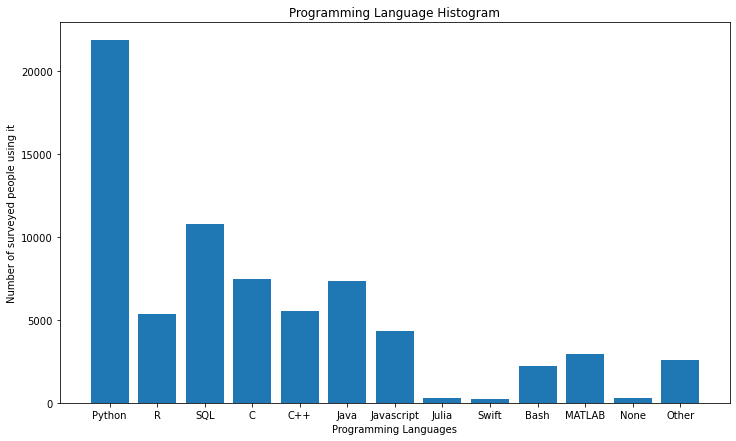

In [43]:
#Observamos la frecuencia de cada lenguaje de programacion.
plt.figure(figsize=(12,7))
plt.bar(languages2['index'],languages2['frequency'])
plt.title('Programming Language Histogram')
plt.xlabel('Programming Languages')
plt.ylabel('Number of surveyed people using it')
  
plt.show()

In [118]:
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
dic1={'Python': 21860,'R':5334,'SQL':10756,'C':7460,'C++':5535,'Java':7317,'Javascript':4332,'Julia':305,'Swift':242,'Bash':2216,'MATLAB':2935,'None':319,'Other':2575}

In [189]:
wpython='Python '*21860
wr='R '*5334
wsql='SQL '*10756
wc='C '*7460
wccc='C++ '*5535
wjava='Java '*7317
wjavascript='Javascript '*4332
wjulia='Julia '*305
wswift='Swift '*242
wbash='Bash '*221
wmatlab='MATLAB '*2935
wnone='None '*319
wother='Other '*2575
# Creamos el string con las palabras repitiendolas el numero de veces que estan registradas en el dataframe.
text1=(wpython+wr+wsql+wc+wccc+wjava+wjavascript+wjulia+wswift+wbash+wmatlab+wnone+wother)

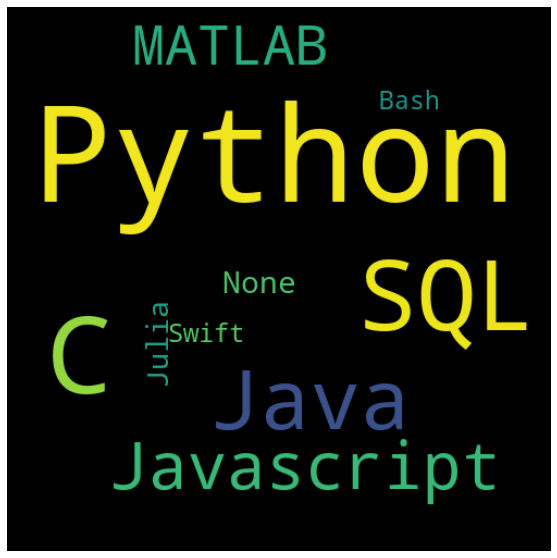

In [190]:
plt.figure(figsize =(10,10))
# Create the wordcloud object
wordcloud = WordCloud(width=500, height=500, margin=0,relative_scaling=0.5,collocations=False).generate(text1)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [50]:
df_lang4[['Python','R','SQL','C','C++','Java','Javascript','Julia','Swift','Bash','MATLAB','Other']]=df_lang4['prog_lang_q7'].str.split(',',expand=True)
df_lang4

,time,age,gender,country_q3,education_q4,role_q5,experience_q6,prog_lang_q7,Python,R,SQL,C,C++,Java,Javascript,Julia,Swift,Bash,MATLAB,Other
index,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,"Python, R",Python,R,None,None,None,None,None,None,None,None,None,None
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,"SQL, C, C++, Java",SQL,C,C++,Java,None,None,None,None,None,None,None,None
2,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,"Python, C++, Java",Python,C++,Java,None,None,None,None,None,None,None,None,None
3,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,Python,None,None,None,None,None,None,None,None,None,None,None
4,781,45-49,Man,India,Doctoral degree,Other,< 1 years,"Python, C, MATLAB",Python,C,MATLAB,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25966,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,"Python, C",Python,C,None,None,None,None,None,None,None,None,None,None
25967,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,"Python, SQL, Bash",Python,SQL,Bash,None,None,None,None,None,None,None,None,None
25968,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,"Python, SQL, Javascript, Bash",Python,SQL,Javascript,Bash,None,None,None,None,None,None,None,None
